In [20]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [4]:
!pip install -U sktime
!pip install --upgrade numba

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [13]:
import random
import os

seed = 42
# os.environ['PYTHONHASHSEED'] = str(seed)
os.environ["PYTHONHASHSEED"] = "42"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"
os.environ["TF_DETERMINISTIC_OPS"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"
os.environ["TF_DETERMINISTIC_OPS"] = "1"

random.seed(seed)

In [14]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
from scipy.signal import find_peaks
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph
from sklearn.cluster import SpectralClustering
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
import umap
from sktime.transformations.panel.rocket import MiniRocket
from sklearn.manifold import TSNE
import hashlib
from tensorflow.keras.initializers import HeNormal

import tensorflow as tf

np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
ekg_df = pd.read_csv("train.dat", header=None)

nested_ekg = pd.DataFrame({
    "ts": [pd.Series(row) for row in ekg_df.values]
})

def hash_nested(nested_df):
    return hashlib.md5(str(nested_df.values).encode()).hexdigest()

print("Hash of nested_ekg:", hash_nested(nested_ekg))

Hash of nested_ekg: 7bcbac82108782d9f3eaa07a2e49d975


In [16]:
def evaluate_clustering(X, labels, model=None):
    results = {
        "Silhouette Score": silhouette_score(X, labels),
        "Calinski-Harabasz Index": calinski_harabasz_score(X, labels),
        "Davies-Bouldin Index": davies_bouldin_score(X, labels),
    }

    if model is not None and hasattr(model, 'inertia_'):
        results["SSE (Inertia)"] = model.inertia_

    return results

In [17]:
X = StandardScaler().fit_transform(ekg_df.values)

kmeans = KMeans(n_clusters=115, random_state=42)
labels = kmeans.fit_predict(X)

metrics = evaluate_clustering(X, labels, model=kmeans)

for k, v in metrics.items():
    print(f"{k}: {v}")

Silhouette Score: -0.01701801505588871
Calinski-Harabasz Index: 62.33362428489813
Davies-Bouldin Index: 1.9951334493431738
SSE (Inertia): 1260345.7463765834


In [18]:
seed = 42
initializer = HeNormal(seed=seed)  # You can also use GlorotNormal or others

input_layer = Input(shape=(178,))
encoded = Dense(64, activation='relu', kernel_initializer=initializer)(input_layer)
embedding_layer = Dense(32, activation='relu', kernel_initializer=initializer)(encoded)

decoded = Dense(64, activation='relu', kernel_initializer=initializer)(embedding_layer)
output_layer = Dense(178, kernel_initializer=initializer)(decoded)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(1e-3), loss='mse')
autoencoder.fit(X, X, epochs=50, batch_size=128, shuffle=False)

encoder = Model(inputs=input_layer, outputs=embedding_layer)
X_embed = encoder.predict(X)
X_embed_scaled = StandardScaler().fit_transform(X_embed)

def hash_array(arr):
    return hashlib.md5(np.ascontiguousarray(arr.astype(np.float64)).tobytes()).hexdigest()

print("X_embed hash:", hash_array(X_embed))

Epoch 1/50


2025-06-06 11:35:32.413667: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7330 
Epoch 2/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0133
Epoch 3/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9805
Epoch 4/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9346
Epoch 5/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8706
Epoch 6/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8052
Epoch 7/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7399
Epoch 8/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6744
Epoch 9/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6151
Epoch 10/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5616
Epoch 11/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5168
Epoch 12/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4811
Epoch 13/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4494
Epoch 14/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4240
Epoch 15/50
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4019
Epoch 16/50
90/90 ━━━━━━━━━━━

2025-06-06 11:35:39.852578: E tensorflow/core/framework/node_def_util.cc:680] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


360/360 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step
X_embed hash: 3c0277fe728e59098bc5d03383f7e6a9


In [19]:
minirocket = MiniRocket(random_state = 42)
minirocket.fit(nested_ekg)

def hash_array(arr):
    """Hash a NumPy array deterministically."""
    return hashlib.md5(arr.astype(np.float64).tobytes()).hexdigest()

def hash_dataframe(df: pd.DataFrame) -> str:
    """Generate a deterministic MD5 hash for a pandas DataFrame."""
    arr = df.to_numpy(dtype=np.float64, copy=True)
    return hashlib.md5(arr.tobytes()).hexdigest()

X_minirocket = minirocket.transform(nested_ekg)
X_minirocket_scaled = StandardScaler().fit_transform(X_minirocket)
print("Raw MiniRocket hash:", hash_dataframe(pd.DataFrame(X_minirocket)))
print("Scaled MiniRocket hash:", hash_array(X_minirocket_scaled))

Raw MiniRocket hash: f73dfa3c0f1da363d2a2a1fc554525bb
Scaled MiniRocket hash: 0e82993de6ba8564ffe6dbfd37d5e2e1


In [57]:
# features_ex1 = []
# for i in range(len(ekg_df)):
#     series = ekg_df.iloc[i].values
#     mean_val = np.mean(series)
#     std_val = np.std(series)
#     skew_val = skew(series)
#     kurt_val = kurtosis(series)
#     peaks, _ = find_peaks(series, prominence=0.5) # Adjust prominence as needed
#     n_peaks = len(peaks)
#     features_ex1.append([mean_val, std_val, skew_val, kurt_val, n_peaks])

# features_df_ex1 = pd.DataFrame(features_ex1, columns=['mean', 'std', 'skewness', 'kurtosis', 'n_peaks'])

# X_ex1 = StandardScaler().fit_transform(features_df_ex1.values)

# kmeans_ex1 = KMeans(n_clusters=115, random_state=42)
# labels_ex1 = kmeans_ex1.fit_predict(X_ex1)

# metrics = evaluate_clustering(X_ex1, labels_ex1, model=kmeans_ex1)

# for k, v in metrics.items():
#     print(f"{k}: {v}")

Silhouette Score: 0.24957968679605275
Calinski-Harabasz Index: 6460.111536543645
Davies-Bouldin Index: 1.1183874256952933
SSE (Inertia): 700.3170031741398


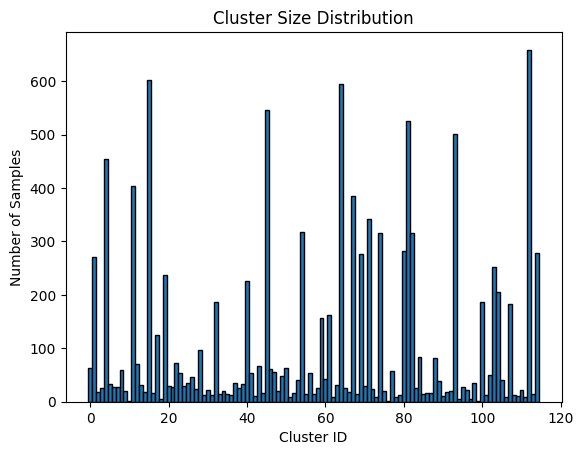

In [20]:
# Feature Extraction - Example 2
def equal_width_partitioning(series, n_buckets):
    min_val = np.min(series)
    max_val = np.max(series)
    bucket_width = (max_val - min_val) / n_buckets
    features = []
    for i in range(n_buckets):
        start = min_val + i * bucket_width
        end = min_val + (i + 1) * bucket_width
        bucket_values = series[(series >= start) & (series < end)]
        if len(bucket_values) > 0:
            features.append(np.mean(bucket_values))
            features.append(np.std(bucket_values))
        else:
            features.append(0) # Handle empty buckets
            features.append(0)
    return np.array(features)

n_buckets = 2
features_ex2 = []
for i in range(len(ekg_df)):
    series = ekg_df.iloc[i].values
    features_ex2.append(equal_width_partitioning(series, n_buckets))

features_df_ex2 = pd.DataFrame(features_ex2, columns=[f'mean_bucket_{i//2 + 1}' if i % 2 == 0 else f'std_bucket_{(i-1)//2 + 1}' for i in range(n_buckets * 2)])

X_ex2 = StandardScaler().fit_transform(features_df_ex2.values)

kmeans_ex2 = KMeans(n_clusters=115, random_state=42)
labels_ex2 = kmeans_ex2.fit_predict(X_ex2)

metrics = evaluate_clustering(X_ex2, labels_ex2, model=kmeans_ex2)

for k, v in metrics.items():
    print(f"{k}: {v}")

plt.hist(labels_ex2, bins=np.arange(min(labels_ex2), max(labels_ex2) + 2) - 0.5, edgecolor='black')
plt.xlabel("Cluster ID")
plt.ylabel("Number of Samples")
plt.title("Cluster Size Distribution")
plt.show()

In [22]:
X_combined = np.hstack([X_embed_scaled, X_ex2, X_minirocket_scaled])

Silhouette Score: 0.3646776080131531
Calinski-Harabasz Index: 14380.0869140625
Davies-Bouldin Index: 0.8033498594682228
SSE (Inertia): 264521.4375


/local/scratch/118631/ipykernel_2416090/1089162001.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', 115)


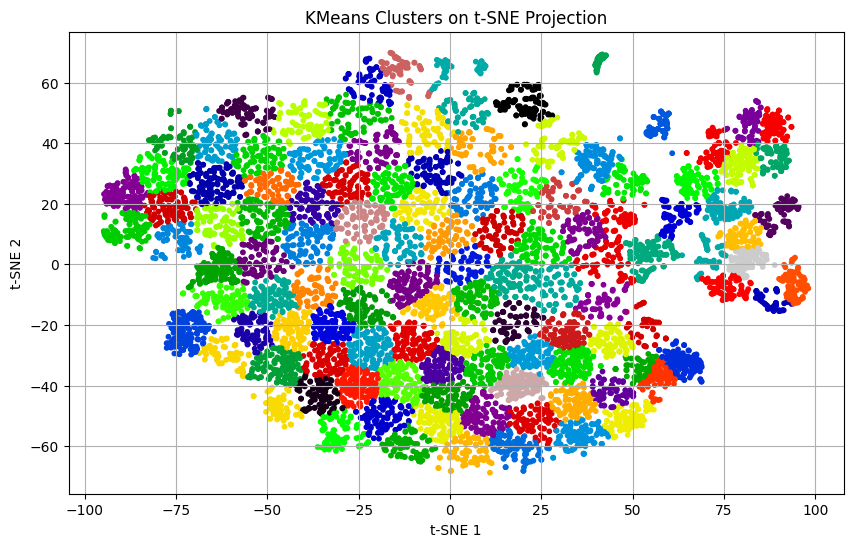

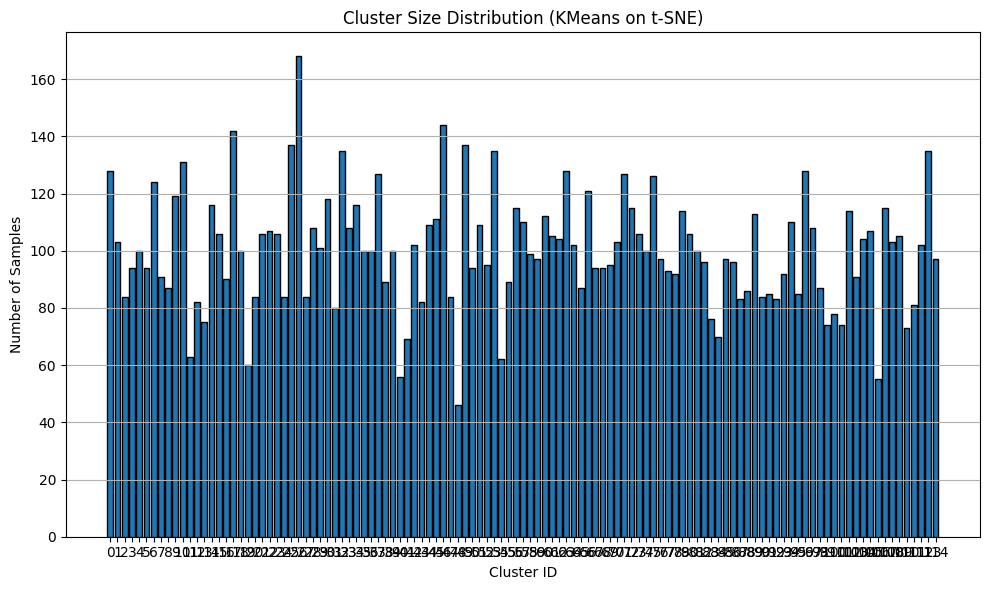

In [23]:
X_tsne = TSNE(
    n_components=2,
    perplexity=30,
    random_state=42
).fit_transform(X_combined)

kmeans_tsne = KMeans(n_clusters=115, random_state=42)
labels_kmeans_tsne = kmeans_tsne.fit_predict(X_tsne)

metrics = evaluate_clustering(X_tsne, labels_kmeans_tsne, model=kmeans_tsne)
for k, v in metrics.items():
    print(f"{k}: {v}")

cmap = plt.cm.get_cmap('nipy_spectral', 115)
plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_kmeans_tsne, cmap=cmap, s=10)
plt.title("KMeans Clusters on t-SNE Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()

unique, counts = np.unique(labels_kmeans_tsne, return_counts=True)
plt.figure(figsize=(10, 6))
plt.bar(unique, counts, edgecolor='black')
plt.xlabel("Cluster ID")
plt.ylabel("Number of Samples")
plt.title("Cluster Size Distribution (KMeans on t-SNE)")
plt.xticks(unique)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Silhouette Score: 0.4091254770755768
Calinski-Harabasz Index: 22064.166015625
Davies-Bouldin Index: 0.7539034014794489
SSE (Inertia): 2629.968017578125


/local/scratch/118599/ipykernel_2615269/377389504.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', 115)


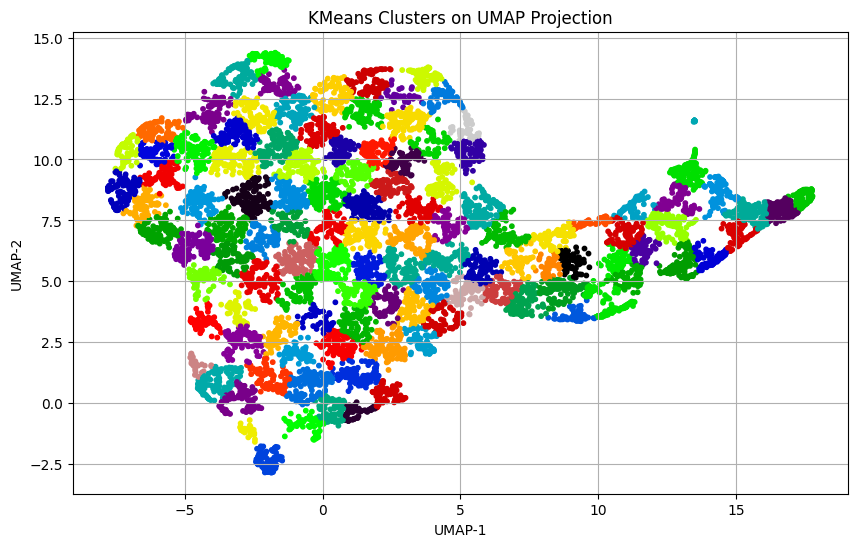

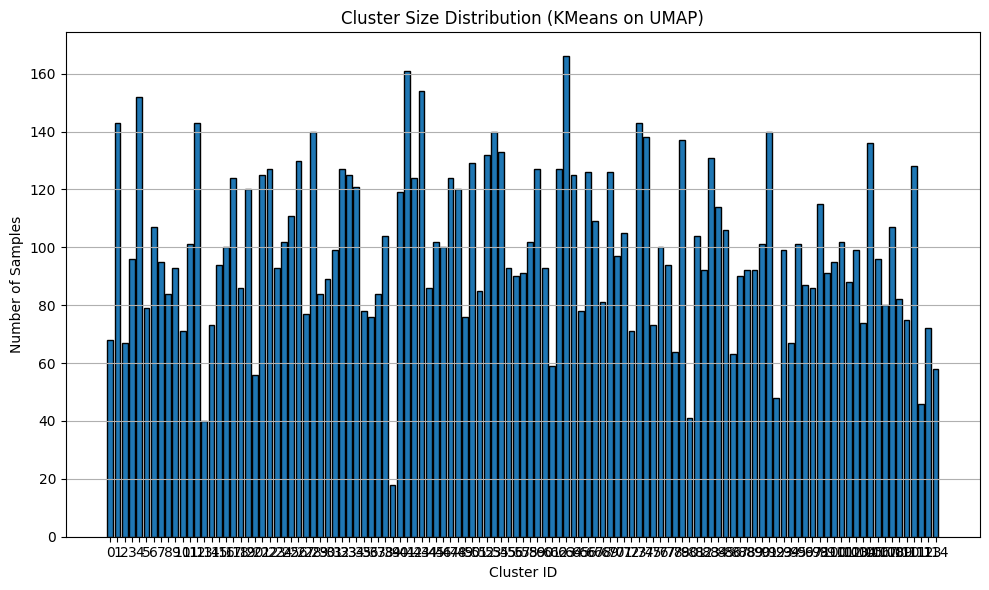

In [39]:
X_umap = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42).fit_transform(X_combined)

kmeans_umap = KMeans(n_clusters=115, random_state=42)
labels_kmeans_umap = kmeans_umap.fit_predict(X_umap)

metrics = evaluate_clustering(X_umap, labels_kmeans_umap, model=kmeans_umap)
for k, v in metrics.items():
    print(f"{k}: {v}")

cmap = plt.cm.get_cmap('nipy_spectral', 115)
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_kmeans_umap, cmap=cmap, s=10)
plt.title("KMeans Clusters on UMAP Projection")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

unique, counts = np.unique(labels_kmeans_umap, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts, edgecolor='black')  # match the plot in your screenshot
plt.xlabel("Cluster ID")
plt.ylabel("Number of Samples")
plt.title("Cluster Size Distribution (KMeans on UMAP)")
plt.xticks(unique)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Original shape: (11500, 178)
Reduced shape: (11500, 2)
Silhouette Score: 0.32890298025404585
Calinski-Harabasz Index: 37895.24160623055
Davies-Bouldin Index: 0.82452303457942
SSE (Inertia): 197989.70939807364


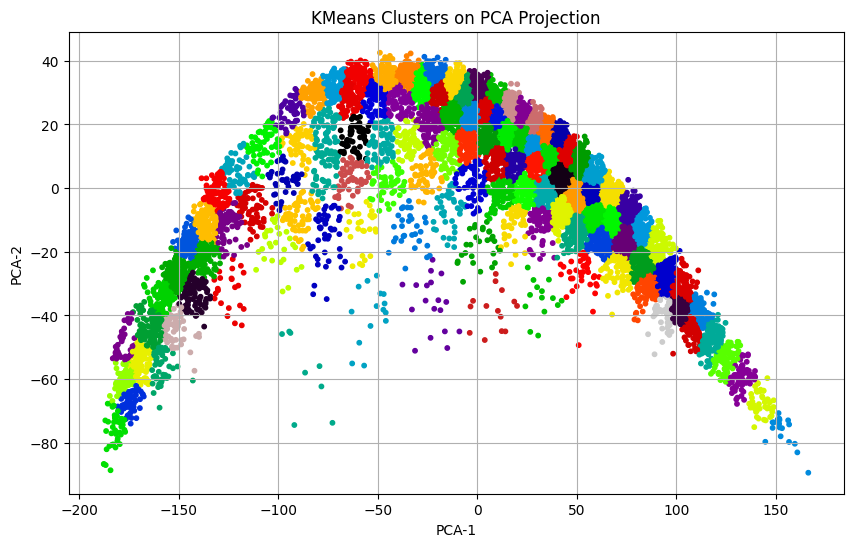

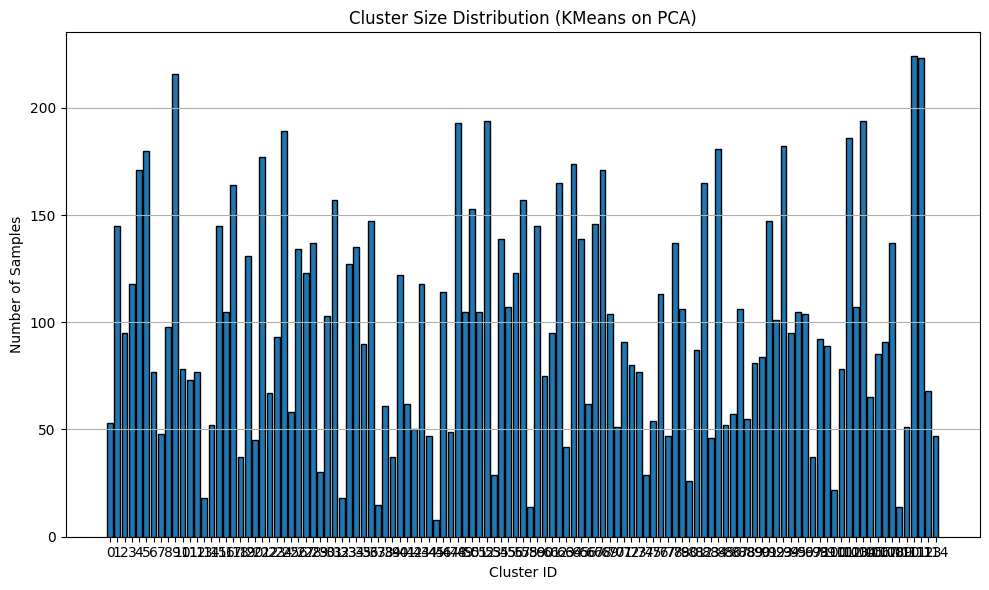

In [96]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_combined)

print("Original shape:", X.shape)
print("Reduced shape:", X_pca.shape)

kmeans_pca = KMeans(n_clusters=115, random_state=42)
labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)

metrics = evaluate_clustering(X_pca, labels_kmeans_pca, model=kmeans_pca)
for k, v in metrics.items():
    print(f"{k}: {v}")

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_pca, cmap='nipy_spectral', s=10)
plt.title("KMeans Clusters on PCA Projection")
plt.xlabel("PCA-1")
plt.ylabel("PCA-2")
plt.grid(True)
plt.show()

unique, counts = np.unique(labels_kmeans_pca, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts, edgecolor='black')
plt.xlabel("Cluster ID")
plt.ylabel("Number of Samples")
plt.title("Cluster Size Distribution (KMeans on PCA)")
plt.xticks(unique)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Bisecting KMeans: clustering complete.
Silhouette Score: 0.33254534006118774
Calinski-Harabasz Index: 30837.345703125
Davies-Bouldin Index: 0.8751606462872025
SSE (Inertia): 969.8286791586805


/local/scratch/117155/ipykernel_1669186/1896091287.py:60: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('nipy_spectral', 115)


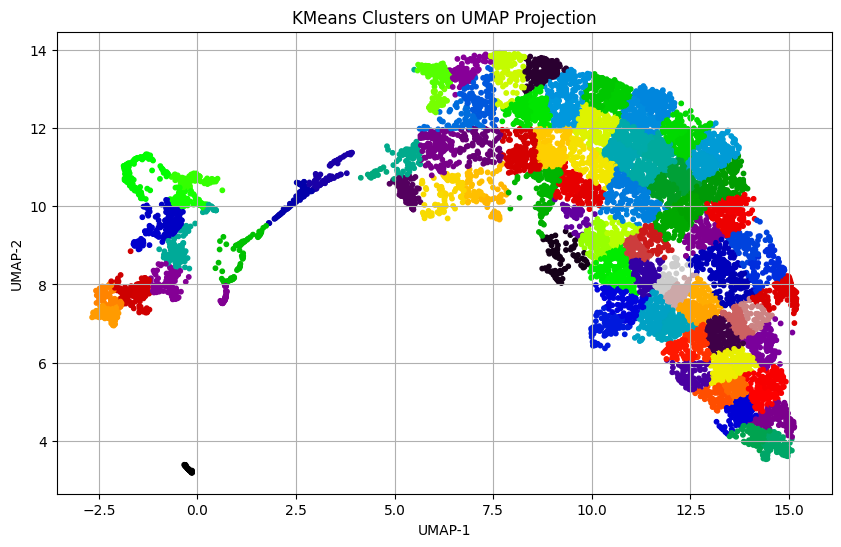

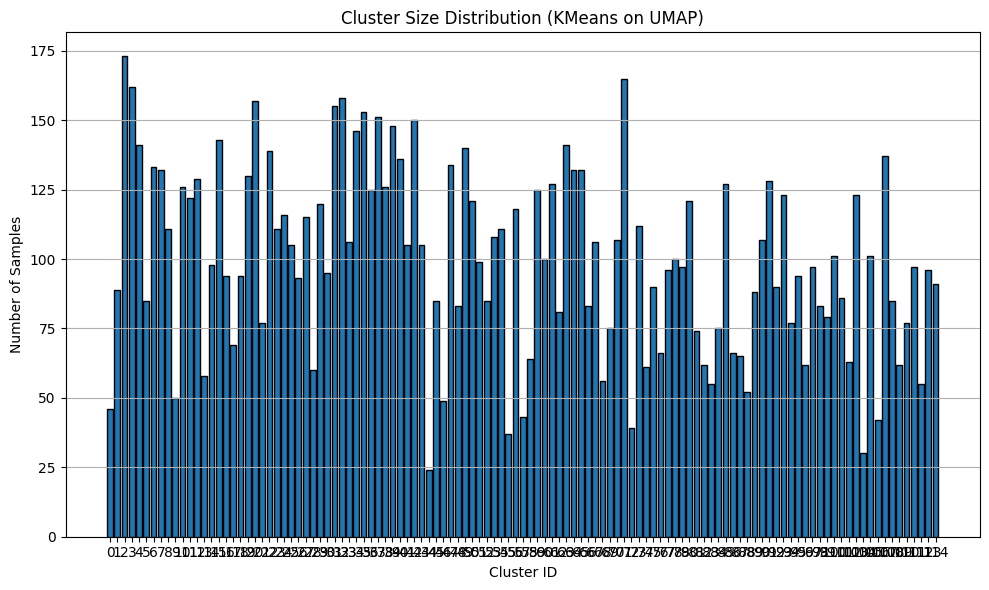

In [79]:
def sse(data, centers):
    _, distances = pairwise_distances_argmin_min(data, centers)
    return np.sum(distances ** 2)

# Optimized bisecting KMeans implementation using index tracking
def bisecting_kmeans(X, k, random_state=42, n_init=10):
    clusters = [np.arange(len(X))]  # Store indices of samples

    while len(clusters) < k:
        # Compute SSE for each cluster
        sses = []
        for indices in clusters:
            center = np.mean(X[indices], axis=0, keepdims=True)
            sses.append(sse(X[indices], center))

        # Select the cluster with the highest SSE to split
        i = np.argmax(sses)
        indices_to_split = clusters.pop(i)
        X_to_split = X[indices_to_split]

        # Apply KMeans to split the selected cluster
        kmeans = KMeans(n_clusters=2, random_state=random_state, n_init=n_init)
        split_labels = kmeans.fit_predict(X_to_split)

        # Separate into two new clusters by index
        cluster1 = indices_to_split[split_labels == 0]
        cluster2 = indices_to_split[split_labels == 1]
        clusters.extend([cluster1, cluster2])

    # Assign cluster labels
    final_labels = np.zeros(len(X), dtype=int)
    for i, indices in enumerate(clusters):
        final_labels[indices] = i

    return final_labels

def evaluate_clustering(X, labels):
    results = {
        "Silhouette Score": silhouette_score(X, labels),
        "Calinski-Harabasz Index": calinski_harabasz_score(X, labels),
        "Davies-Bouldin Index": davies_bouldin_score(X, labels),
    }
    return results

def compute_cluster_centers(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

k = 115
labels_bisect = bisecting_kmeans(X_umap, k=k, random_state=42)
print("Bisecting KMeans: clustering complete.")

metrics = evaluate_clustering(X_umap, labels_bisect)
for key, val in metrics.items():
    print(f"{key}: {val}")

centers = compute_cluster_centers(X_umap, labels_bisect, k)
sse_value = sse(X_umap, centers)
print(f"SSE (Inertia): {sse_value}")

cmap = plt.cm.get_cmap('nipy_spectral', 115)
plt.figure(figsize=(10, 6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=labels_bisect, cmap=cmap, s=10)
plt.title("KMeans Clusters on UMAP Projection")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

unique, counts = np.unique(labels_bisect, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts, edgecolor='black')
plt.xlabel("Cluster ID")
plt.ylabel("Number of Samples")
plt.title("Cluster Size Distribution (KMeans on UMAP)")
plt.xticks(unique)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Silhouette Score: 0.3462296426296234
Calinski-Harabasz Index: 13272.6171875
Davies-Bouldin Index: 0.819945422923688


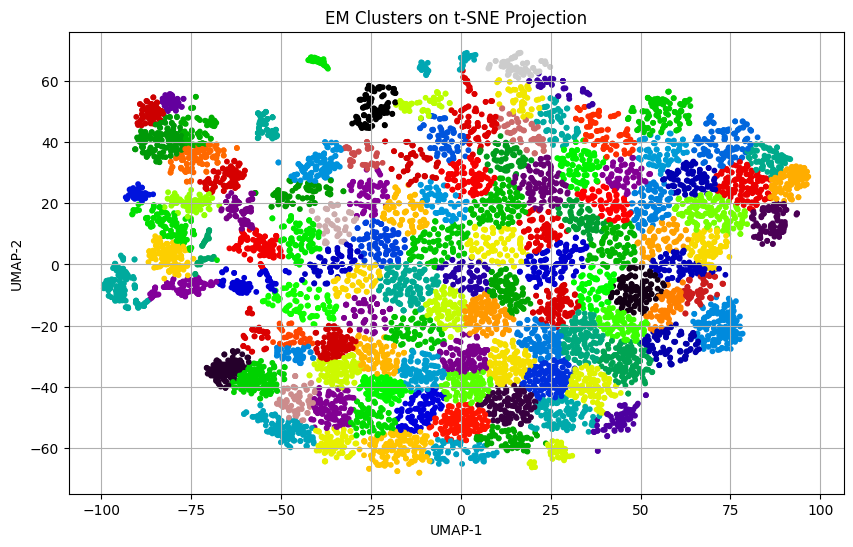

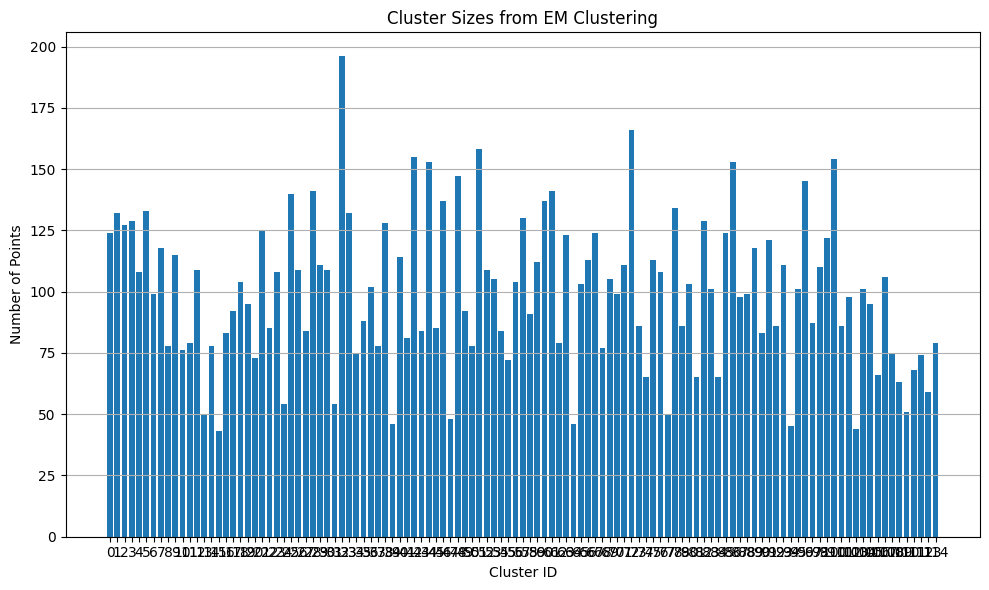

In [18]:
gmm = GaussianMixture(n_components=115, random_state=42)
labels_em = gmm.fit_predict(X_tsne)
metrics = evaluate_clustering(X_tsne, labels_em)
for key, val in metrics.items():
    print(f"{key}: {val}")

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_em, cmap='nipy_spectral', s=10)
plt.title("EM Clusters on t-SNE Projection")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

unique, counts = np.unique(labels_em, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Points")
plt.title("Cluster Sizes from EM Clustering")
plt.xticks(unique)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

Silhouette Score: 0.3407790958881378
Calinski-Harabasz Index: 31606.5625
Davies-Bouldin Index: 0.8204226234510135


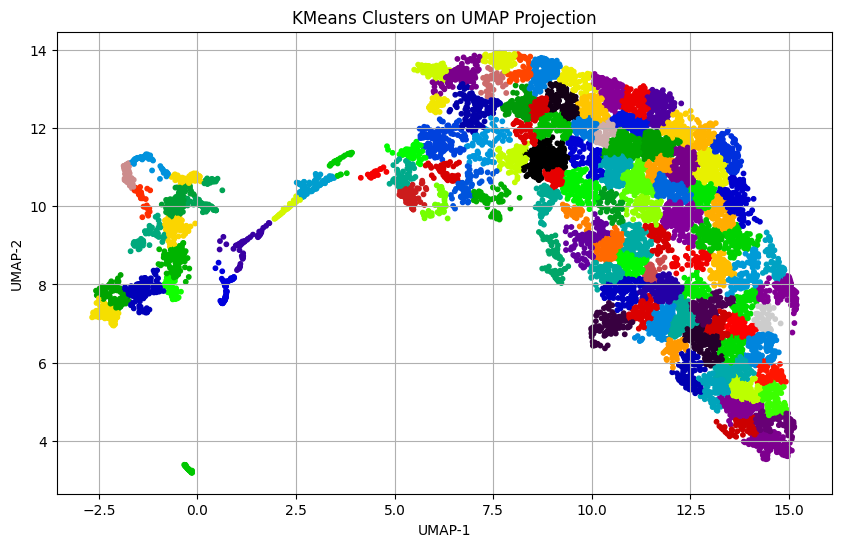

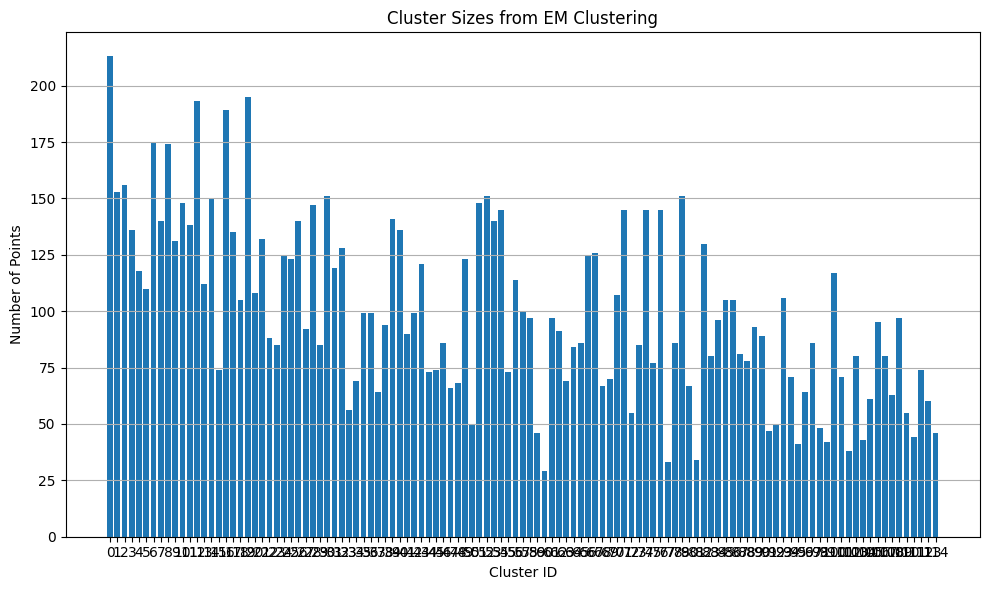

In [74]:
model = AgglomerativeClustering(n_clusters=115, linkage='ward', metric='euclidean')
labels_agg = model.fit_predict(X_tsne)
metrics = evaluate_clustering(X_tsne, labels_agg)
for key, val in metrics.items():
    print(f"{key}: {val}")

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_agg, cmap='nipy_spectral', s=10)
plt.title("KMeans Clusters on UMAP Projection")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

unique, counts = np.unique(labels_agg, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Points")
plt.title("Cluster Sizes from EM Clustering")
plt.xticks(unique)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

/WAVE/users2/unix/avattuone/.local/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


Silhouette Score: 0.3175449073314667
Calinski-Harabasz Index: 10663.1669921875
Davies-Bouldin Index: 0.8049834292767866


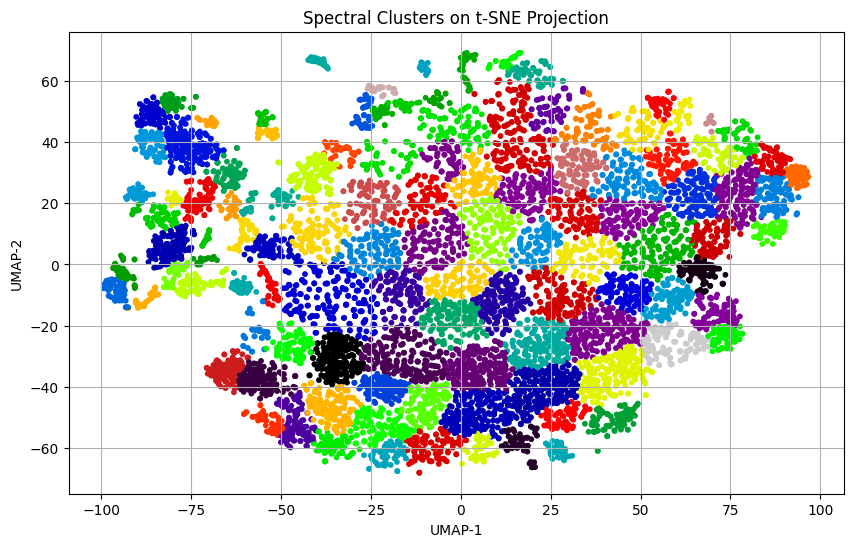

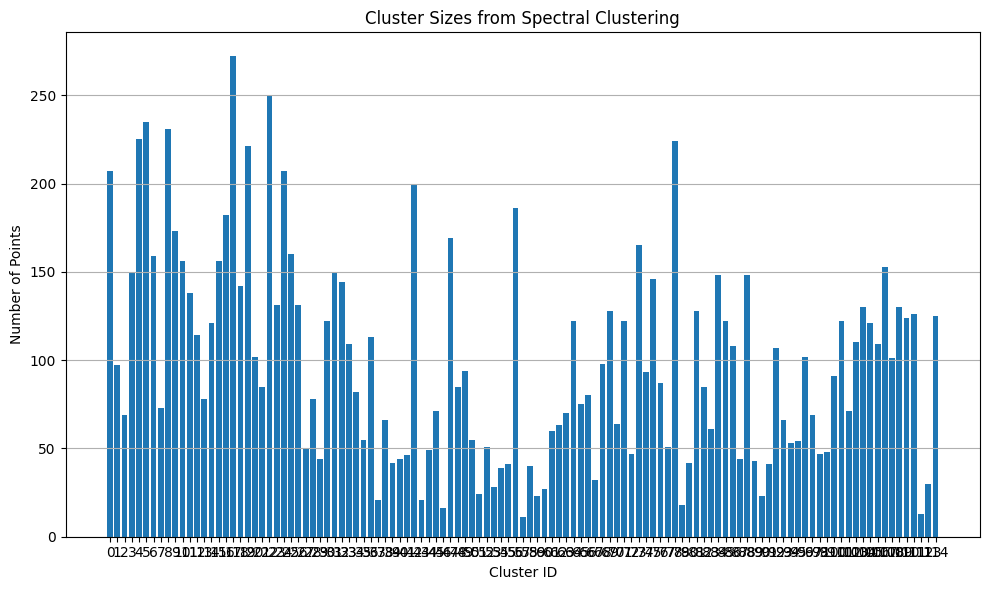

In [17]:
knn_graph = kneighbors_graph(X_tsne, n_neighbors=10, mode='connectivity', include_self=False)
symmetric_graph = 0.5 * (knn_graph + knn_graph.T)

spectral = SpectralClustering(
    n_clusters=115,
    affinity='precomputed',
    assign_labels='kmeans',
    random_state=42
)

labels_spec = spectral.fit_predict(symmetric_graph)

metrics = evaluate_clustering(X_tsne, labels_spec)
for k, v in metrics.items():
    print(f"{k}: {v}")

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels_spec, cmap='nipy_spectral', s=10)
plt.title("Spectral Clusters on t-SNE Projection")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.grid(True)
plt.show()

unique, counts = np.unique(labels_spec, return_counts=True)

plt.figure(figsize=(10, 6))
plt.bar(unique, counts)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Points")
plt.title("Cluster Sizes from Spectral Clustering")
plt.xticks(unique)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [24]:
submission = labels_kmeans_tsne + 1
np.savetxt("submission.txt", submission, fmt="%d")